In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import warnings

warnings.filterwarnings("ignore")

In [2]:
train=pd.read_csv('/kaggle/input/web-traffic-time-series-forecasting/train_1.csv.zip'
                 ).fillna(0)
train.head()

,Page,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,...,2016-12-22,2016-12-23,2016-12-24,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31
0,2NE1_zh.wikipedia.org_all-access_spider,18.0,11.0,5.0,13.0,14.0,9.0,9.0,22.0,26.0,...,32.0,63.0,15.0,26.0,14.0,20.0,22.0,19.0,18.0,20.0
1,2PM_zh.wikipedia.org_all-access_spider,11.0,14.0,15.0,18.0,11.0,13.0,22.0,11.0,10.0,...,17.0,42.0,28.0,15.0,9.0,30.0,52.0,45.0,26.0,20.0
2,3C_zh.wikipedia.org_all-access_spider,1.0,0.0,1.0,1.0,0.0,4.0,0.0,3.0,4.0,...,3.0,1.0,1.0,7.0,4.0,4.0,6.0,3.0,4.0,17.0
3,4minute_zh.wikipedia.org_all-access_spider,35.0,13.0,10.0,94.0,4.0,26.0,14.0,9.0,11.0,...,32.0,10.0,26.0,27.0,16.0,11.0,17.0,19.0,10.0,11.0
4,52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,48.0,9.0,25.0,13.0,3.0,11.0,27.0,13.0,36.0,10.0


In [3]:
def parse_page(page):
    x = page.split('_')
    return ' '.join(x[:-3]), x[-3], x[-2], x[-1]


In [4]:
parse_page(train.Page[0])

('2NE1', 'zh.wikipedia.org', 'all-access', 'spider')

In [5]:
l = list(train.Page.apply(parse_page))
df = pd.DataFrame(l)
df.columns =['Subject','Sub_Page','Access','Agent']

In [6]:
train = pd.concat([train,df],axis=1)
del train['Page']

In [7]:
train.head()

,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,2015-07-10,...,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31,Subject,Sub_Page,Access,Agent
0,18.0,11.0,5.0,13.0,14.0,9.0,9.0,22.0,26.0,24.0,...,14.0,20.0,22.0,19.0,18.0,20.0,2NE1,zh.wikipedia.org,all-access,spider
1,11.0,14.0,15.0,18.0,11.0,13.0,22.0,11.0,10.0,4.0,...,9.0,30.0,52.0,45.0,26.0,20.0,2PM,zh.wikipedia.org,all-access,spider
2,1.0,0.0,1.0,1.0,0.0,4.0,0.0,3.0,4.0,4.0,...,4.0,4.0,6.0,3.0,4.0,17.0,3C,zh.wikipedia.org,all-access,spider
3,35.0,13.0,10.0,94.0,4.0,26.0,14.0,9.0,11.0,16.0,...,16.0,11.0,17.0,19.0,10.0,11.0,4minute,zh.wikipedia.org,all-access,spider
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.0,11.0,27.0,13.0,36.0,10.0,52 Hz I Love You,zh.wikipedia.org,all-access,spider


<AxesSubplot:>

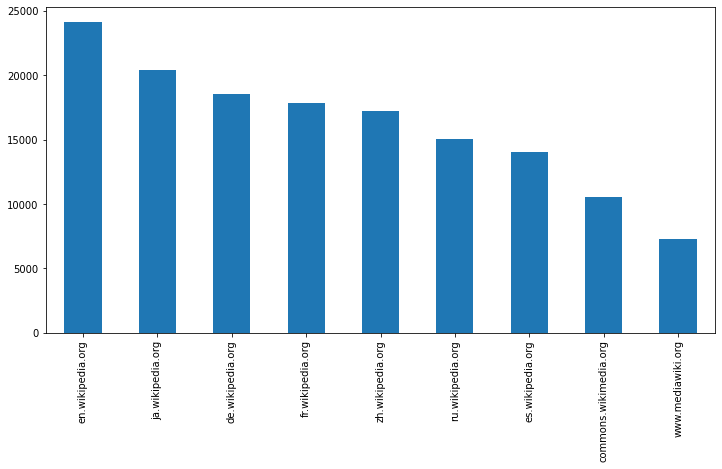

In [8]:
train.Sub_Page.value_counts().plot(kind='bar',figsize=(12,6))

<AxesSubplot:>

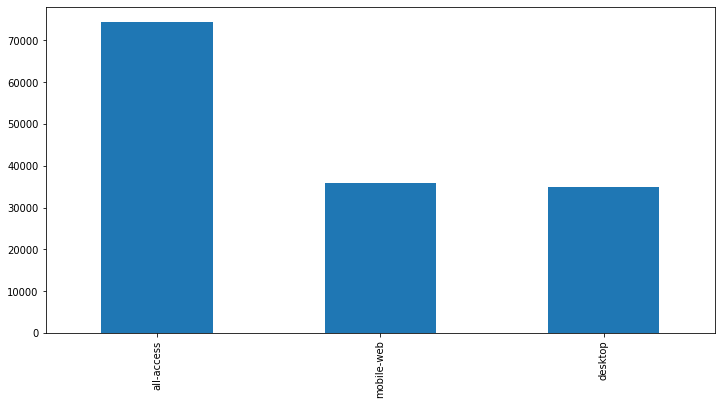

In [9]:
train.Access.value_counts().plot(kind='bar',figsize=(12,6))

<AxesSubplot:>

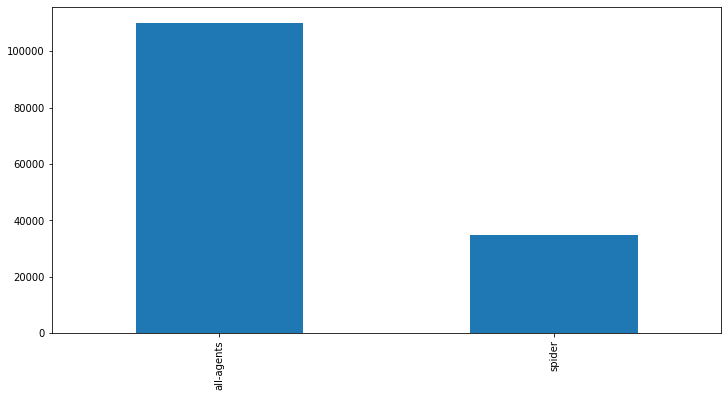

In [10]:
train.Agent.value_counts().plot(kind='bar',figsize=(12,6))

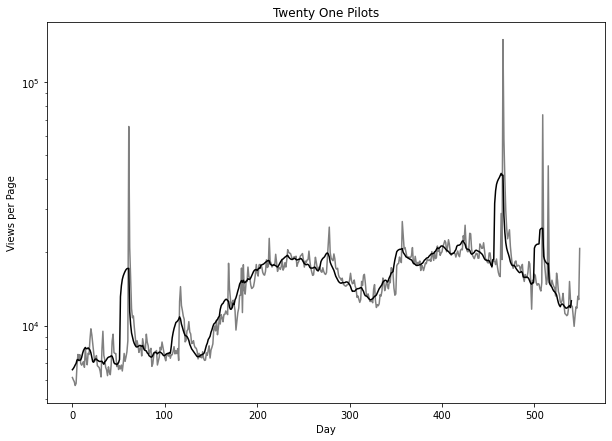

In [11]:
idx = 39457

window = 10

data = train.iloc[idx,0:-4]
name = train.iloc[idx,-4]

days = [r for r in range(data.shape[0] )]

fig, ax = plt.subplots(figsize=(10, 7))
plt.ylabel('Views per Page')
plt.xlabel('Day')
plt.title(name)
ax.plot(days,data.values,color='grey')
ax.plot(np.convolve(data,
                    np.ones((window,))/window, 
                    mode='valid'),color='black')
ax.set_yscale('log')

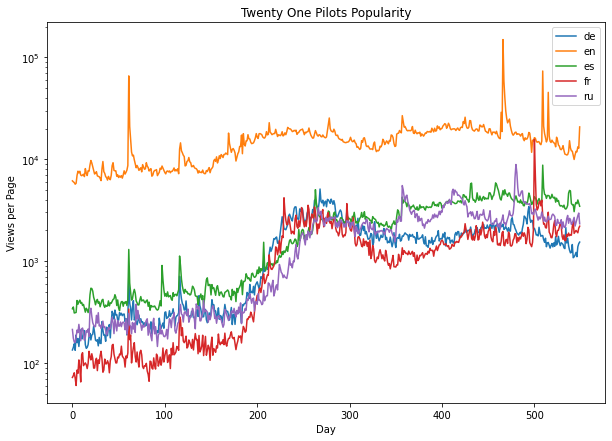

In [12]:
fig, ax = plt.subplots(figsize=(10, 7))
plt.ylabel('Views per Page')
plt.xlabel('Day')
plt.title('Twenty One Pilots Popularity')
ax.set_yscale('log')
for country in ['de','en','es','fr','ru']:
    idx= np.where((train['Subject'] == 'Twenty One Pilots') 
                  & (train['Sub_Page'] ==
                     '{}.wikipedia.org'.format(country)) &
                  (train['Access'] == 'all-access') &
                  (train['Agent'] == 'all-agents'))
 
    idx=idx[0][0]
 
    data = train.iloc[idx,0:-4]
    handle = ax.plot(days,data.values,label=country)
 
    ax.legend()

In [13]:
#import statsmodels.api as sm
#time = np.linspace(0,10,1000)
#series = time
#series = series + np.random.randn(1000) *0.2
#mdl = sm.OLS(time, series).fit()
#trend = mdl.predict(time)



In [14]:
from scipy.fftpack import fft
data = train.iloc[:,0:-4]
fft_complex = fft(data)
fft_mag =[np.sqrt(np.real(x)*np.real(x)+np.imag(x)*np.imag(x)) for x in fft_complex]


In [15]:
arr = np.array(fft_mag)
fft_mean = np.mean(arr,axis=0)

In [16]:
fft_xvals = [day / fft_mean.shape[0] for day in range(fft_mean.shape[0])]

In [17]:
npts = len(fft_xvals) // 2 + 1
fft_mean = fft_mean[:npts]
fft_xvals = fft_xvals[:npts]


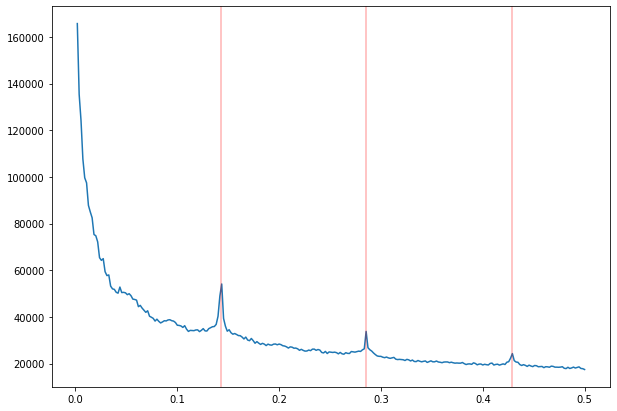

In [18]:
fig, ax = plt.subplots(figsize=(10, 7))
ax.plot(fft_xvals[1:],fft_mean[1:])
plt.axvline(x=1./7,color='red',alpha=0.3)
plt.axvline(x=2./7,color='red',alpha=0.3)
plt.axvline(x=3./7,color='red',alpha=0.3)

Text(0.5, 1.0, 'Oh My Girl zh.wikipedia.org')

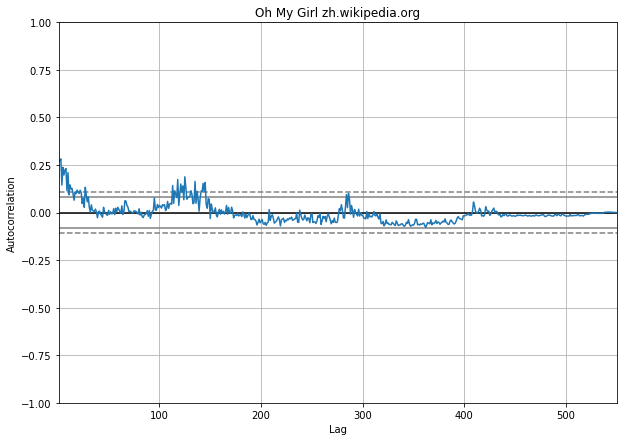

In [19]:
from pandas.plotting import autocorrelation_plot

fig = plt.figure(figsize=(10, 7))
autocorrelation_plot(data.iloc[110])
plt.title(' '.join(train.loc[110,['Subject','Sub_Page']]))

Text(0.5, 1.0, '1K Autocorrelations')

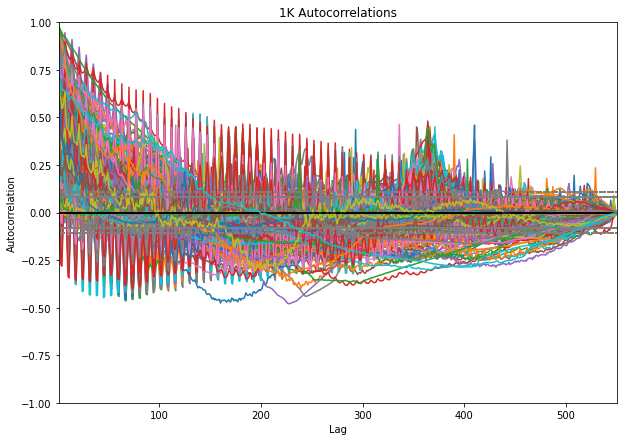

In [20]:
plt.figure(figsize=(10, 7))

a = np.random.choice(data.shape[0],1000)
for i in a:
    autocorrelation_plot(data.iloc[i])
plt.title('1K Autocorrelations')

In [21]:
from sklearn.model_selection import train_test_split
X = data.iloc[:,:500]
y = data.iloc[:,500:]
X_train, X_val, y_train, y_val =train_test_split(X.values, y.values,test_size=0.1, random_state=42)

In [22]:
def mape(y_true,y_pred):
    eps = 1
    err = np.mean(np.abs((y_true - y_pred) / (y_true + eps))) * 100
    return err


In [23]:
lookback = 50
lb_data = X_train[:,-lookback:]
med = np.median(lb_data,axis=1,keepdims=True)
err = mape(y_train,med)
err

68.1061532742806

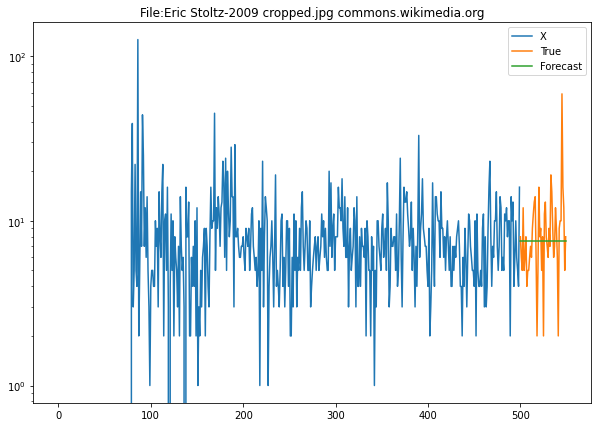

In [24]:
idx = 15000
fig, ax = plt.subplots(figsize=(10, 7))
ax.plot(np.arange(500),X_train[idx], label='X')
ax.plot(np.arange(500,550),y_train[idx],label='True')
ax.plot(np.arange(500,550),np.repeat(med[idx],50),label='Forecast')
plt.title(' '.join(train.loc[idx,['Subject','Sub_Page']]))
ax.legend()
ax.set_yscale('log')


# **Arima**

In [25]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(X_train[0], order=(5,1,5))
model = model.fit()
model.summary()

/opt/conda/lib/python3.7/site-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  500
Model:                 ARIMA(5, 1, 5)   Log Likelihood               -3891.138
Date:                Sun, 22 Jan 2023   AIC                           7804.277
Time:                        00:54:26   BIC                           7850.615
Sample:                             0   HQIC                          7822.461
                                - 500                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0845      0.062     -1.371      0.170      -0.205       0.036
ar.L2         -0.6681      0.050    -13.435      0.000      -0.766      -0.571
ar.L3         -0.4980      0.075     -6.633      0.000      -0.645      -0.351
ar.L4         -0.2286      0.051     -4.483      0.000      -0.328      -0.129
ar.L5         -0.8453      0.063    -13.421      0.000      -0.969      -0.722
ma.L1         -0.1298      0.060     -2.145      0.032      -0.248      -0.011
ma.L2          0.3698      0.059      6.276      0.000       0.254       0.485
ma.L3          0.4462      0.062      7.224      0.000       0.325       0.567
ma.L4         -0.2575      0.053     -4.905      0.000      -0.360      -0.155
ma.L5          0.6546      0.046     14.186      0.000       0.564       0.745
sigma2        5.1e+05   2.15e+04     23.683      0.000    4.68e+05    5.52e+05
===================================================================================
Ljung-Box (L1) (Q):                  28.37   Jarque-Bera (JB):              6081.43
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):              95.79   Skew:                             1.53
Prob(H) (two-sided):                  0.00   Kurtosis:                        19.83
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Text(0.5, 1.0, 'ARIMA residuals for 2NE1 pageviews')

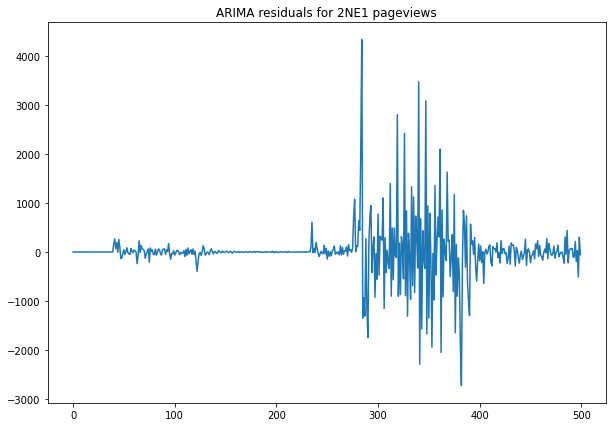

In [26]:
fig, ax = plt.subplots(figsize=(10, 7))
idx = 0
residuals = pd.DataFrame(model.resid)
ax.plot(residuals)

plt.title('ARIMA residuals for 2NE1 pageviews')

<AxesSubplot:title={'center':'ARIMA residual distribution 2NE1 ARIMA'}, ylabel='Density'>

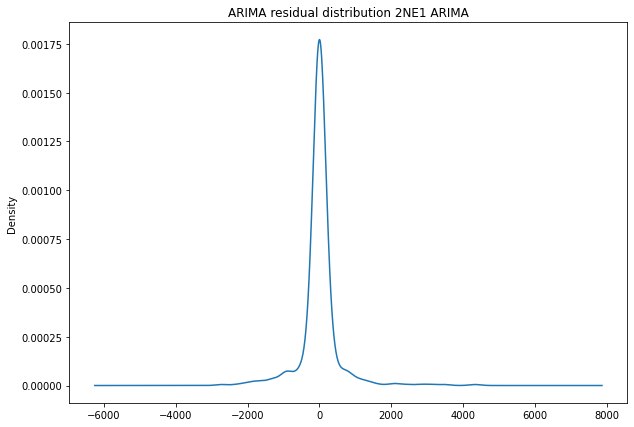

In [27]:
residuals.plot(kind='kde',figsize=(10,7),title='ARIMA residual distribution 2NE1 ARIMA',legend = False)

In [28]:
predictions = model.forecast(50,alpha=0.05)

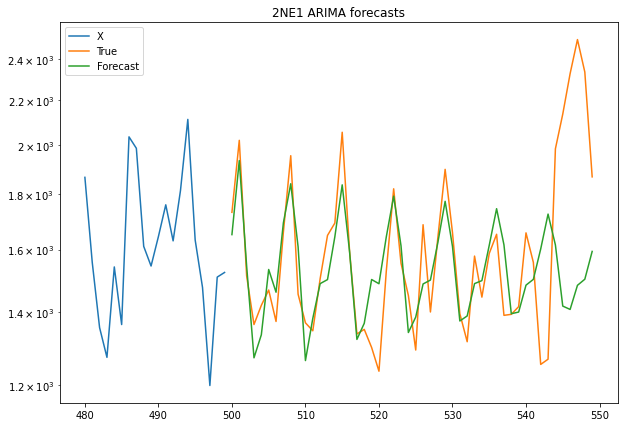

In [29]:
fig, ax = plt.subplots(figsize=(10, 7))


ax.plot(np.arange(480,500),X_train[0,480:], label='X')
ax.plot(np.arange(500,550),y_train[0],label='True')

ax.plot(np.arange(500,550),predictions,label='Forecast')


plt.title('2NE1 ARIMA forecasts')
ax.legend()
ax.set_yscale('log')

# **kalman**

In [30]:
n_seasons = 7
state_transition = np.zeros((n_seasons+1,
n_seasons+1))
state_transition[0,0] = 1
state_transition[1,1:-1] = [-1.0] * (n_seasons-1)
state_transition[2:,1:-1] = np.eye(n_seasons-1)

In [31]:
state_transition

array([[ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0., -1., -1., -1., -1., -1., -1.,  0.],
       [ 0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.]])

In [32]:
observation_model = [[1,1] + [0]*(n_seasons-1)]
observation_model

[[1, 1, 0, 0, 0, 0, 0, 0]]

In [33]:
smoothing_factor = 5.0
level_noise = 0.2 / smoothing_factor
observation_noise = 0.2
season_noise = 1e-3
process_noise_cov = np.diag([level_noise,
season_noise] + [0]*(n_seasons-1))**2
observation_noise_cov = observation_noise**2

In [34]:
!pip install simdkalman
import simdkalman

In [35]:
kf = simdkalman.KalmanFilter(state_transition =
                             state_transition,process_noise =
                             process_noise_cov,observation_model =
                             observation_model,observation_noise =observation_noise_cov)


In [36]:
result = kf.compute(X_train[0], 50)

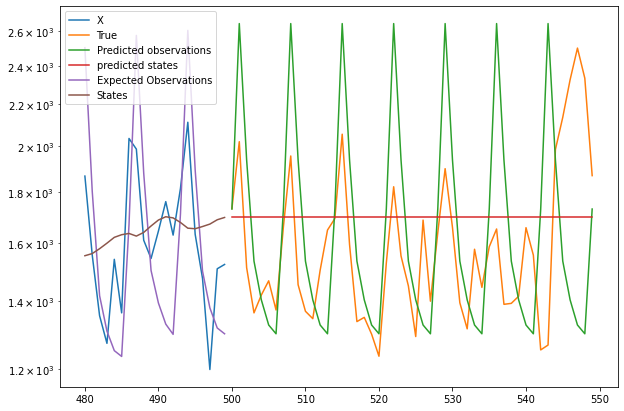

In [37]:
fig, ax = plt.subplots(figsize=(10, 7))
ax.plot(np.arange(480,500),X_train[0,480:],label='X')
ax.plot(np.arange(500,550),y_train[0],label='True')
ax.plot(np.arange(500,550),result.predicted.observations.mean,label='Predicted observations')
ax.plot(np.arange(500,550),result.predicted.states.mean[:,0],label='predicted states')
ax.plot(np.arange(480,500),result.smoothed.observations.mean[480:],label='Expected Observations')
ax.plot(np.arange(480,500),result.smoothed.states.mean[480:,0],label='States')
ax.legend()
ax.set_yscale('log')

# **Redes neuronales**

In [38]:
import datetime
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
weekdays = [datetime.datetime.strptime(date, '%Y-%m-%d').strftime('%a')
 for date in train.columns.values[:-4]]

In [39]:
day_one_hot =LabelEncoder().fit_transform(weekdays)
day_one_hot = day_one_hot.reshape(-1, 1)

In [40]:
day_one_hot =OneHotEncoder(sparse=False).fit_transform(day_one_hot)
day_one_hot = np.expand_dims(day_one_hot,0)

In [41]:
agent_int = LabelEncoder().fit(train['Agent'])
agent_enc = agent_int.transform(train['Agent'])
agent_enc = agent_enc.reshape(-1, 1)
agent_one_hot = OneHotEncoder(sparse=False).fit(agent_enc)
del agent_enc


In [42]:
page_int = LabelEncoder().fit(train['Sub_Page'])
page_enc = page_int.transform(train['Sub_Page'])
page_enc = page_enc.reshape(-1, 1)
page_one_hot =OneHotEncoder(sparse=False).fit(page_enc)
del page_enc
acc_int = LabelEncoder().fit(train['Access'])
acc_enc = acc_int.transform(train['Access'])
acc_enc = acc_enc.reshape(-1, 1)
acc_one_hot =OneHotEncoder(sparse=False).fit(acc_enc)
del acc_enc


In [43]:
def lag_arr(arr, lag, fill):
    filler = np.full((arr.shape[0],lag,1),-1)
    comb = np.concatenate((filler,arr),axis=1)
    result = comb[:,:arr.shape[1]]
    return result

In [44]:
def single_autocorr(series, lag):
    s1 = series[lag:]
    s2 = series[:-lag]
    ms1 = np.mean(s1)
    ms2 = np.mean(s2)
    ds1 = s1 - ms1
    ds2 = s2 - ms2
    divider = np.sqrt(np.sum(ds1 * ds1)) * np.sqrt(np.sum(ds2 * ds2))
    return np.sum(ds1 * ds2) / divider if divider!= 0 else 0

In [45]:
def batc_autocorr(data,lag,series_length):
    corrs = []
    for i in range(data.shape[0]):
        c = single_autocorr(data, lag)
        corrs.append(c)
    corr = np.array(corrs)
    corr = np.expand_dims(corr,-1)
    corr = np.expand_dims(corr,-1)
    corr = np.repeat(corr,series_length,axis=1)
    return corr


In [46]:
def get_batch(train,start=0,lookback = 100):
    assert((start + lookback) <= (train.shape[1] - 5)) , 'End of lookback would be out of bounds'
    
    data = train.iloc[:,start:start + lookback].values
    target = train.iloc[:,start + lookback].values
    target = np.log1p(target)
    
    log_view = np.log1p(data)
    log_view = np.expand_dims(log_view,axis=-1)
    
    days = day_one_hot[:,start:start + lookback]
    days = np.repeat(days,repeats=train.shape[0],axis=0)
    
    year_lag = lag_arr(log_view,365,-1)
    halfyear_lag = lag_arr(log_view,182,-1)
    quarter_lag = lag_arr(log_view,91,-1)
    
    agent_enc = agent_int.transform(train['Agent'])
    agent_enc = agent_enc.reshape(-1, 1)
    agent_enc = agent_one_hot.transform(agent_enc)
    agent_enc = np.expand_dims(agent_enc,1)
    agent_enc = np.repeat(agent_enc,lookback,axis=1)
    
    page_enc = page_int.transform(train['Sub_Page'])
    page_enc = page_enc.reshape(-1, 1)
    page_enc = page_one_hot.transform(page_enc)
    page_enc = np.expand_dims(page_enc, 1)
    page_enc = np.repeat(page_enc,lookback,axis=1)
    
    acc_enc = acc_int.transform(train['Access'])
    acc_enc = acc_enc.reshape(-1, 1)
    acc_enc = acc_one_hot.transform(acc_enc)
    acc_enc = np.expand_dims(acc_enc,1)
    acc_enc = np.repeat(acc_enc,lookback,axis=1)
    
    year_autocorr = batc_autocorr(data,lag=365,series_length=lookback)
    halfyr_autocorr = batc_autocorr(data,lag=182,series_length=lookback)
    quarter_autocorr = batc_autocorr(data,lag=91,series_length=lookback)
    medians = np.median(data,axis=1)
    medians = np.expand_dims(medians,-1)
    medians = np.expand_dims(medians,-1)
    medians = np.repeat(medians,lookback,axis=1)
    
    
    '''
    print(log_view.shape)
    print(days.shape)
    print(year_lag.shape)
    print(halfyear_lag.shape)
    print(page_enc.shape)
    print(agent_enc.shape)
    print(acc_enc.shape)'''
    
    batch = np.concatenate((log_view,
                            days, 
                            year_lag, 
                            halfyear_lag, 
                            quarter_lag,
                            page_enc,
                            agent_enc,
                            acc_enc, 
                            year_autocorr, 
                            halfyr_autocorr,
                            quarter_autocorr, 
                            medians),axis=2)
    
    return batch, target

In [47]:
def generate_batches(train,batch_size = 32, lookback = 100):
    num_samples = train.shape[0]
    num_steps = train.shape[1] - 5
    while True:
        for i in range(num_samples // batch_size):
            batch_start = i * batch_size
            batch_end = batch_start + batch_size

            seq_start = np.random.randint(num_steps - lookback)
            X,y = get_batch(train.iloc[batch_start:batch_end],start=seq_start)
            yield X,y

In [48]:
from keras.models import Sequential
from keras.layers import Conv1D, MaxPool1D, Dense, Activation, GlobalMaxPool1D, Flatten, Dropout

In [49]:
n_features = 29
max_len = 100
model = Sequential()
model.add(Conv1D(16,5, input_shape=(100,29)))
model.add(Activation('relu'))
model.add(MaxPool1D(5))
model.add(Conv1D(16,5))
model.add(Activation('relu'))
model.add(MaxPool1D(5))
model.add(Flatten())
model.add(Dense(1))

2023-01-22 00:54:49.074436: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [50]:
model.compile(optimizer='adam',loss='mean_absolute_percentage_error')

In [51]:
batch_size = 128
train_df, val_df = train_test_split(train, test_size=0.1)
train_gen = generate_batches(train_df,batch_size=batch_size)
val_gen = generate_batches(val_df, batch_size=batch_size)

n_train_samples = train_df.shape[0]
n_val_samples = val_df.shape[0]

In [52]:
model.fit_generator(train_gen, 
                    epochs=1,
                    steps_per_epoch=n_train_samples // batch_size, 
                    validation_data= val_gen, 
                    validation_steps=n_val_samples // batch_size)

2023-01-22 00:54:50.796705: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


1019/1019 [==============================] - 46s 44ms/step - loss: 3878964.2500 - val_loss: 1335972.6250


In [53]:
from keras.layers import SimpleRNN

model = Sequential()
model.add(SimpleRNN(16,input_shape=(max_len,n_features)))
model.add(Dense(1))

model.compile(optimizer='adam',loss='mean_absolute_percentage_error')

In [54]:
model.fit_generator(train_gen, 
                    epochs=1,
                    steps_per_epoch=n_train_samples // batch_size, 
                    validation_data= val_gen, 
                    validation_steps=n_val_samples // batch_size)

1019/1019 [==============================] - 49s 47ms/step - loss: 6443599.0000 - val_loss: 2371628.2500


In [55]:
from keras.layers import SimpleRNN

model = Sequential()
model.add(SimpleRNN(32,return_sequences=True,input_shape=(max_len,n_features)))
model.add(SimpleRNN(16, return_sequences = True))
model.add(SimpleRNN(16))
model.add(Dense(1))

model.compile(optimizer='adam',loss='mean_absolute_percentage_error')

In [56]:
model.fit_generator(train_gen, 
                    epochs=1,
                    steps_per_epoch=n_train_samples // batch_size, 
                    validation_data= val_gen, 
                    validation_steps=n_val_samples // batch_size)

1019/1019 [==============================] - 129s 124ms/step - loss: 2228541.0000 - val_loss: 681478.9375


In [57]:
from keras.layers import LSTM

model = Sequential()
model.add(LSTM(16, 
               recurrent_dropout=0.1,
               return_sequences=True,
               input_shape=(max_len,n_features)))

model.add(LSTM(16,recurrent_dropout=0.1))

model.add(Dense(1))

In [58]:
model.compile(optimizer='adam',loss='mean_absolute_percentage_error')


In [59]:
model.fit_generator(train_gen, 
                    epochs=1,
                    steps_per_epoch=n_train_samples // batch_size, 
                    validation_data= val_gen, 
                    validation_steps=n_val_samples // batch_size)

1019/1019 [==============================] - 256s 246ms/step - loss: 714320.1250 - val_loss: 145163.1094
